# Lindenmayer Systems

### Generating Artificial Plants with Lindenmayer Systems

Artificial plants, often used in computer graphics and simulations, can be realistically generated using Lindenmayer systems (L-systems). These systems are a mathematical formalism introduced by biologist Aristid Lindenmayer in 1968. Originally designed to model the growth processes of plant development, L-systems have found applications in various fields, including computer graphics, where they are used to create fractal-like structures.

#### What are Lindenmayer Systems?

Lindenmayer systems, or L-systems, are parallel rewriting systems and a type of formal grammar. They consist of:

1. **An Alphabet**: A set of symbols that can be used to construct strings.
2. **A Set of Production Rules**: Rules that expand each symbol into a larger string of symbols.
3. **An Initial Axiom**: A string of symbols from which the system starts.

These simple rules can generate complex and intricate patterns, especially useful for simulating natural phenomena like plant growth.

#### Theory of Lindenmayer Systems

In L-systems, we start with an initial string (the axiom) and apply production rules iteratively. At each step, each symbol in the current string is replaced by a new string according to the production rules. This process is repeated for a number of iterations to produce a final string.

For example, consider a simple L-system defined as follows:

- **Alphabet**: {A, B}
- **Axiom**: A
- **Production Rules**: 
  - A → AB
  - B → A

Starting with the axiom "A":
1. A → AB (First iteration)
2. AB → ABA (Second iteration)
3. ABA → ABAAB (Third iteration)

This iterative process can create complex patterns, especially when combined with graphical interpretations, where symbols are translated into drawing commands.

#### Using L-systems to Generate Artificial Plants

In computer graphics, L-systems are often used to generate fractal-like patterns that resemble the branching structures of plants. Each symbol in the L-system can correspond to a drawing command. For example, "F" can mean "draw forward," "+" can mean "turn right," and "-" can mean "turn left."

Let's implement a simple L-system in Python to generate artificial plants.


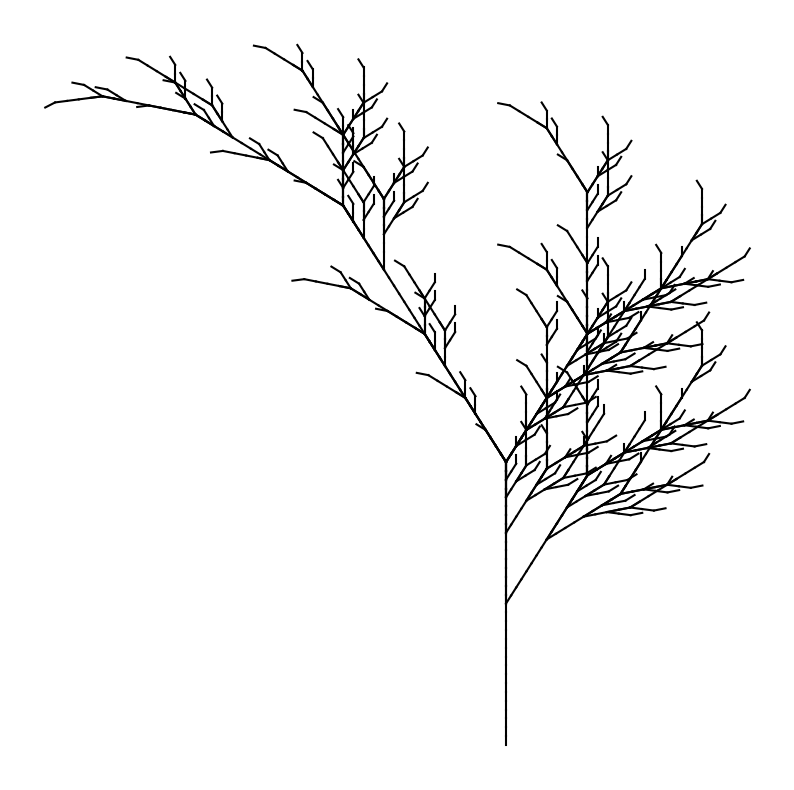

In [7]:
import matplotlib.pyplot as plt
import math

# L-system class
class LSystem:
    def __init__(self, axiom, rules):
        self.axiom = axiom
        self.rules = rules
        self.current = axiom

    def iterate(self, iterations):
        for _ in range(iterations):
            self.current = ''.join([self.rules.get(char, char) for char in self.current])
        return self.current

# Function to draw the L-system
def draw_lsystem(commands, angle=25, length=10):
    stack = []
    x, y = 0, 0
    current_angle = 90

    plt.figure(figsize=(10, 10))
    plt.axis('off')

    for command in commands:
        if command == 'F':
            new_x = x + length * math.cos(math.radians(current_angle))
            new_y = y + length * math.sin(math.radians(current_angle))
            plt.plot([x, new_x], [y, new_y], color='k')
            x, y = new_x, new_y
        elif command == '+':
            current_angle += angle
        elif command == '-':
            current_angle -= angle
        elif command == '[':
            stack.append((x, y, current_angle))
        elif command == ']':
            x, y, current_angle = stack.pop()

    plt.show()

# Example L-system (Fractal Plant)
axiom = "X"
rules = {
    "X": "F-[[X]+X]+F[+XFF]-X",
    "F": "FF"
}

# Create L-system
lsystem = LSystem(axiom, rules)
commands = lsystem.iterate(5)

# Draw the L-system
draw_lsystem(commands)



In this code:

1. We define a class `LSystem` to handle the L-system's axiom and production rules.
2. We implement the `iterate` method to apply the production rules iteratively.
3. We define the `draw_lsystem` function to interpret the L-system commands and draw the resulting pattern using `matplotlib`.

By adjusting the axiom, rules, angle, and length, you can create a wide variety of plant-like structures. This approach provides a powerful tool for generating realistic and complex artificial plants in computer graphics.